# Linear Regression

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### Generate dataset

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.4790, -1.0237]) 
label: tensor([8.6415])


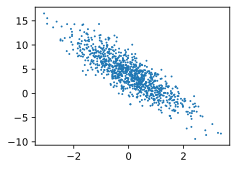

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

### Read dataset

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-2.2053, -0.2045],
        [ 0.6248, -0.4075],
        [-0.7042, -0.1092],
        [ 1.2738,  0.5626],
        [ 0.3248,  1.7861],
        [-2.1572, -0.5116],
        [-0.2452, -0.0654],
        [ 1.3439, -0.6461],
        [ 0.0693, -0.2398],
        [-0.8557,  0.5200]]) 
 tensor([[ 0.4943],
        [ 6.8448],
        [ 3.1464],
        [ 4.8215],
        [-1.2193],
        [ 1.6174],
        [ 3.9219],
        [ 9.0870],
        [ 5.1577],
        [ 0.7289]])


### Initialize model parameters

In [7]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### Define model

In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

### Define the loss function

In [9]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### Define optimization algorithm

In [10]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Training

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.050974
epoch 2, loss 0.000222
epoch 3, loss 0.000051


In [12]:
print(f'Estimated error of w: {true_w - w.reshape(true_w.shape)}')
print(f'Estimated error of b: {true_b - b}')

Estimated error of w: tensor([ 0.0001, -0.0007], grad_fn=<SubBackward0>)
Estimated error of b: tensor([0.0005], grad_fn=<RsubBackward1>)
